> # __Importing Libraries__

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


> # __Reading text file__

In [10]:
df = pd.read_table('fruit_data_with_colors.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


> # __Checking Null Values__

In [11]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

> # __Droping Irrelevant Columns__

In [12]:
df.drop(['fruit_label' , 'fruit_subtype'] , axis=1 , inplace=True)

> # __Columns of data__

In [13]:
df.columns

Index(['fruit_name', 'mass', 'width', 'height', 'color_score'], dtype='object')

> # __Description of dataset__

In [15]:
df.describe()

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


> # __Step 1: Pre-Processing__

In [25]:
X = df.iloc[:,1:5]
# Or
# X = df.iloc[:,[1,2,3,4]]
X

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79
5,80,5.8,4.3,0.77
6,80,5.9,4.3,0.81
7,76,5.8,4.0,0.81
8,178,7.1,7.8,0.92
9,172,7.4,7.0,0.89


In [27]:
y = df.iloc[:,0]
y

0        apple
1        apple
2        apple
3     mandarin
4     mandarin
5     mandarin
6     mandarin
7     mandarin
8        apple
9        apple
10       apple
11       apple
12       apple
13       apple
14       apple
15       apple
16       apple
17       apple
18       apple
19       apple
20       apple
21       apple
22       apple
23       apple
24      orange
25      orange
26      orange
27      orange
28      orange
29      orange
30      orange
31      orange
32      orange
33      orange
34      orange
35      orange
36      orange
37      orange
38      orange
39      orange
40      orange
41      orange
42      orange
43       lemon
44       lemon
45       lemon
46       lemon
47       lemon
48       lemon
49       lemon
50       lemon
51       lemon
52       lemon
53       lemon
54       lemon
55       lemon
56       lemon
57       lemon
58       lemon
Name: fruit_name, dtype: object

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.20 , random_state=0)

> # __Standard Scaling dataset__

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [32]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

> # __Step 2: Fitting KNN Model__

In [34]:
knn = KNeighborsClassifier()

In [35]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

> # __Step3: Prediction__

In [42]:
y_pred = knn.predict(X_test)
y_pred

array(['orange', 'orange', 'lemon', 'lemon', 'apple', 'apple', 'orange',
       'lemon', 'orange', 'apple', 'mandarin', 'apple'], dtype=object)

In [41]:
y_test

26      orange
35      orange
43       lemon
28      orange
11       apple
2        apple
34      orange
46       lemon
40      orange
22       apple
4     mandarin
10       apple
Name: fruit_name, dtype: object

> # __Accuracy of Model__

In [47]:
from termcolor import colored
print(colored("Accuracy-Score=" , 'yellow'),accuracy_score(y_pred , y_test))

Accuracy-Score= 0.9166666666666666


> # __Classification Report of the Model__

In [48]:
print(colored("Classification-Report=", 'red'))
print(classification_report(y_pred , y_test))

Classification-Report=
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
       lemon       1.00      0.67      0.80         3
    mandarin       1.00      1.00      1.00         1
      orange       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.95      0.92      0.92        12
weighted avg       0.93      0.92      0.91        12



> # __Confusion Matrix__

In [49]:
cf = confusion_matrix(y_pred , y_test)
cf

array([[4, 0, 0, 0],
       [0, 2, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 4]], dtype=int64)

<AxesSubplot:>

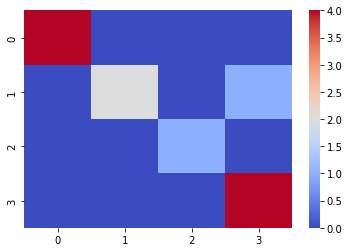

In [52]:
import seaborn as sns 
sns.heatmap(cf , cmap='coolwarm')

In [53]:
X_test

array([[ 2.90254255,  2.89824184,  0.94093665, -0.34660224],
       [-0.38218532, -0.21814724,  0.05668293, -0.2371489 ],
       [ 0.29955065, -0.09349167,  1.68915133, -0.78441559],
       [-0.53712531, -0.71676949, -0.4874732 , -0.56550891],
       [-0.04131733, -0.21814724, -0.14737562,  1.62355785],
       [ 0.02065867,  0.15581945, -0.41945369, -1.87894898],
       [-0.50613731,  0.40513058, -0.01133659, -0.2371489 ],
       [ 0.64041864,  0.03116389,  1.62113182, -0.67496225],
       [-0.32020932, -0.21814724, -0.21539514,  0.09121112],
       [-0.53712531,  0.03116389, -0.4874732 ,  1.07629116],
       [-1.40478928, -1.58935843, -2.18796113,  0.20066445],
       [-0.13428133, -0.46745836, -0.35143417,  1.73301119]])

> # __Testing data scatter plot__

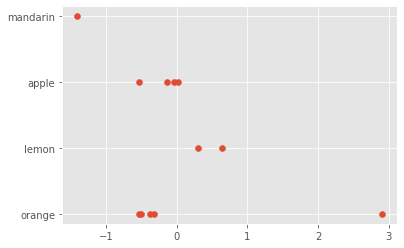

In [82]:
with plt.style.context('ggplot'):
    plt.scatter(X_test[:,0] , y_test)

> # __Training data Scatter Plot__

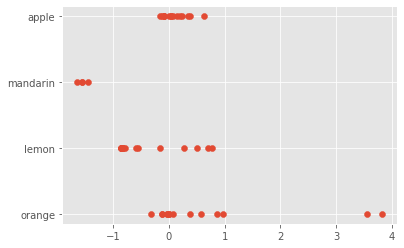

In [81]:
with plt.style.context('ggplot'):
    plt.scatter(X_train[:,0] , y_train)